In [1]:
# We import the libraries that we will use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re


In [2]:
# We customize what we want to see
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
# We upload the data set, we call it "tiburon"
tiburon = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")
tiburon


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#We get the info of the database to see the Dtype of lements we have. This might come in handy later on
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [5]:
#we cleant the data by first changing all the columns name special characters and spaces into " _ ", 
# this way we wont have any issue when manipulating columns.
#we first make a list with all the original colums, then we print them to see what we want to clean
#on the secon line of code, we replace them and obtain a dictionary with the old names and new names.
#we check again and see if there is any other special character to be cleaned.
columnas = list(tiburon.columns)
print(columnas)
tiburon_two = {columna: columna.replace(" ", "_").replace(".", "_").replace(":", "").lower() for columna in columnas}
print(tiburon_two)




['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
{'Case Number': 'case_number', 'Date': 'date', 'Year': 'year', 'Type': 'type', 'Country': 'country', 'Area': 'area', 'Location': 'location', 'Activity': 'activity', 'Name': 'name', 'Sex ': 'sex_', 'Age': 'age', 'Injury': 'injury', 'Fatal (Y/N)': 'fatal_(y/n)', 'Time': 'time', 'Species ': 'species_', 'Investigator or Source': 'investigator_or_source', 'pdf': 'pdf', 'href formula': 'href_formula', 'href': 'href', 'Case Number.1': 'case_number_1', 'Case Number.2': 'case_number_2', 'original order': 'original_order', 'Unnamed: 22': 'unnamed_22', 'Unnamed: 23': 'unnamed_23'}


In [6]:
# in this step we check the columns one by one to see that they are all understandable. 
#we can see that columns like "sex_" have an extra character that must be cleaned. This will be done manually
#It can also be done with Regex, but since its just a few, is faster manually
tiburon_two["Sex "] = "sex"
tiburon_two["Fatal (Y/N)"] = "fatal"
tiburon_two["Species "] = "species"



In [7]:
#we rename all columns from the dictionary tiburon_two into our dataset, calling it tiburon_renamed.
#we print the head to see that all columns have the correct number.
tiburon_renamed = tiburon.rename(columns=tiburon_two)
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# we drop all duplicated rows, since we dont need duplicated data.
tiburon_renamed.drop_duplicates(inplace=True)

In [9]:
#We check the new shape
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Here we can sum all the nans inside the columns
tiburon_renamed.isna().sum()

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

In [11]:
#as we can see, unnamed 22 and 23 have 99% of the elements as NaN, so we can drop them
tiburon_renamed.drop(["unnamed_22", "unnamed_23"],axis=1,inplace=True)

In [12]:
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# I want to eliminate columns that are the same, mainly because they are useless and take extra space and proccesing time
# This step could had been done before changing the variable names, but I prefer it in this order. 
# All comparison follow the same structure: Check the shape of the dataframe (6312 rows) 
# and see if we get the same amount of rows betwen two columns

In [14]:
# This is a bit confusing but here it goes:
# 1) After seeing the data head i realized that Date and Case_numbers are all dates that looks the same.
# 2) What I did was to check which rows does case_number and cas_number_2 are not the same, and we got 14 rows
# 3) I displayed them next to date, case_number, case_number_1 and case_number_2 and see if those 14 rows are also dates and similar.
# 4) The conclusion is that all case_number are the same as date and should be drop
tiburon_renamed[["date","case_number","case_number_1","case_number_2"]][(tiburon_renamed["case_number"])!=(tiburon_renamed["case_number_2"])].sample(14)

,date,case_number,case_number_1,case_number_2
6307,NaN,0,NaN,NaN
6304,NaN,0,NaN,NaN
8702,NaN,NaN,NaN,NaN
6302,NaN,0,NaN,NaN
5944,May-1864,1864.05,1864.05.00,1864.05.00
6305,NaN,0,NaN,NaN
6309,NaN,0,NaN,NaN
25722,NaN,xx,NaN,NaN
6308,NaN,0,NaN,NaN
5488,Reported 06-Sep-1905,NaN,1905.09.06.R,1905.09.06.R


In [15]:
# Since they al reflect date, we will erase all the case_number columns and leave only the date column
tiburon_renamed.drop(["case_number","case_number_1","case_number_2"],axis=1,inplace=True)

In [16]:
tiburon_renamed



,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# I do this in order to see a cleaner dataframe
tiburon_renamed.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
1993,06-Nov-2000,2000.0,Unprovoked,AUSTRALIA,Western Australia,"Cottesloe Beach, Perth",Swimming,Ken Crew,M,49,"FATAL, torso bitten, leg severed",Y,06h30,"White shark, 5 m [16.5']","B. May, AAP; G. Thiel",2000.11.06.a-KenCrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4310.0
609,24-Oct-2013,2013.0,Unprovoked,AUSTRALIA,New South Wales,South Narrabeen Beach,Surfing,Anthony Joyce,M,41,Injuries to right foot,N,18h15,Wobbegong shark,"A. Brenneka, Shark Attack Survivors",2013.10.24-Joyce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5694.0
1437,02-Sep-2006,2006.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Noordhoek,Surfing,Steven Harcourt-Wood,M,37,"No injury, shark rammed surfboard",N,NaN,"White shark, 3.5m","Cape Times, 9/3/2006",2006.09.02.a-Harcourt-Wood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4866.0
5161,Nov-1925,1925.0,Unprovoked,USA,Puerto Rico,"Condado Beach, San Juan",NaN,Lawyers secretary,F,NaN,Laceration across abdomen,N,NaN,NaN,"V.M. Coppleson (1958), pp.48 & 265",1925.11.00.b-secretary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1142.0
2611,26-Dec-1990,1990.0,Invalid,SOUTH AFRICA,Eastern Cape Province,Port Elizabeth,NaN,male,M,NaN,Survived,NaN,NaN,Questionable incident,Unverified report,1990.12.26-NV-SouthAfrica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3692.0
664,18-Jun-2013,2013.0,Unprovoked,USA,Hawaii,Kona Coast State Park,Swimming,James Kerrigan,M,28,Right thigh & calf bitten,N,12h50,"Tiger shark, 14'","Hawaii News Now, 6/18/2013",2013.06.18-Kerrigan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5639.0
4820,Reported 21-Mar-1938,1938.0,Unprovoked,FIJI,Viti Levu,Singatoka River,Wading,male,M,NaN,unknown,N,NaN,NaN,"Time Magazine, 3/21/1938",1938.03.21.R-FijianMethodist.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1483.0
3378,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2925.0
900,06-Jul-2011,2011.0,Unprovoked,REUNION,Saint-Gilles,Roches Noires,Surfing,Arnaud Dussel,M,16,Minor injuries: scratches on nose & ankle. Boa...,N,14h50,NaN,"V. Boyer, Le Journal de lîle de la Réunion, 7...",2011.07.06-Arnaud.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5403.0
4551,Mar-1948,1948.0,Provoked,PAPUA NEW GUINEA,"New Ireland Province, Bismarck Archipelago","Punam Passage, Rataman census div, Namatanai",Spearfishing,Reiman,M,30,Leg bitten by shark that he had speared PROVO...,N,NaN,"""grey shark""","A. M. Rapson, p.147; D. Baldridge, pp.128 & 261",1948.03.00-Reiman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1752.0


In [18]:
#here i count the amount of NaN that i have in each column
tiburon_renamed.isna().sum()


date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
original_order               3
dtype: int64

In [19]:
#I decided to drop all the columns that i wont use in my hypothesis
tiburon_clean = tiburon_renamed.drop(["species","time","original_order","href","href_formula","pdf","investigator_or_source"],axis=1)

In [20]:
#By making these lines of code, I can erase all the columns and rows where all values are NaN
tiburon_clean.dropna(axis=0, how='all',inplace=True)
tiburon_clean.dropna(axis=1, how='all',inplace=True)


In [21]:
#In this loop i can check the unique values of each column
# I then print al lvalues and see which function il lcreate to clean further
for i in tiburon_clean.keys():
    
    print(i, len(list(tiburon_clean[i].unique())))

date 5433
year 250
type 9
country 213
area 826
location 4109
activity 1533
name 5231
sex 7
age 158
injury 3738
fatal 9


In [22]:
set(list(tiburon_clean["date"].unique()))

{'30-Sep-1982',
 '24-Jun-1892',
 '15-Feb-2018',
 '27-Sep-1978',
 '09-May-2012',
 '25-Jun-2007',
 '28-Sep-1995',
 '12-Aug-1881',
 'Reported 26-Apr-1929',
 '18-Mar-2014',
 '26-Apr-2004',
 'Sep-1974',
 '1960',
 '27-Sep-2007',
 '20-Oct-1923',
 'Reported 09-Feb-1914',
 '18-Jul-2008',
 '03-May-1895',
 'Jun-1965',
 '22-Nov-1925',
 '  24-Mar-1990',
 '12-Mar-1947',
 'Reported 12-Oct-1899',
 '06-Aug-1945',
 '31-Jul-2017',
 '24-May-2006',
 '23-Jan-1940',
 '12-Jul-1936',
 '25-Mar-1969',
 '26-Aug-1965',
 '05-Jan-2017',
 '22-Jul-2005',
 '04-Apr-2004',
 '21-Aug-1999',
 '02-Mar-1943 to 07-Mar-1943',
 '24-Jul-2017',
 '14-Jan-1944',
 '12-30-1980',
 'Reported 28-Dec-1898',
 '21-Apr-1998',
 '04-Sep-2016',
 'Reported 15-Jan-2004 ',
 '05-Aug-1979',
 '18-Feb-1968',
 '17-Aug-2002',
 '14-Nov-1963',
 '1920 -1923',
 '22-Dec-1986',
 '11-Apr-1971',
 '19-Jun-2003',
 '16-Feb-1946',
 '22-Aug-2007',
 '18-Aug-1946',
 '18-Dec-2006',
 '25-Dec-1963',
 '15-Jul-1874',
 '08-Apr-1930',
 'Mar-1910',
 'Reported 09-Apr-1909',
 '

In [23]:
set(list(tiburon_clean["type"].unique()))

{'Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked',
 nan}

In [24]:
set(list(tiburon_clean["country"].unique()))

{' PHILIPPINES',
 ' TONGA',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CEYLON (SRI LANKA)',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH PO

In [25]:
tiburon_clean.activity.fillna("unknow",inplace=True)

In [26]:
def regex_activity(x):
    return "".join(re.findall(r'\b(\w+ing)\b',x)).lower()


In [27]:
tiburon_clean["activity_verb"] = tiburon_clean.activity.apply(regex_activity)

In [28]:
set(list(tiburon_clean["activity_verb"].unique()))


{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'attemptingdrowning',
 'attemptingfishing',
 'attemptingsailing',
 'attemptingswimming',
 'awaiting',
 'bathing',
 'bathingstanding',
 'bathingsurfing',
 'bathingswimming',
 'bathingwashing',
 'bathingwhaling',
 'being',
 'beingfishing',
 'bending',
 'boarding',
 'boardingsurfing',
 'boardingswimming',
 'boardingwading',
 'boating',
 'bodyboarding',
 'bodysurfing',
 'boeing',
 'bringing',
 'burning',
 'canoeing',
 'carrying',
 'casting',
 'catching',
 'chasingbathingriding',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'clingingrowing',
 'collecting',
 'coming',
 'competingfishing',
 'competingrowing',
 'competingspearfishingtowing',
 'competingstanding',
 'conducting',
 'crabbing',
 'crabbingspearing',
 'crawling',
 'crayfishing',
 'crossing',
 'crossingfighting',
 'crossingswimming',
 'crouching',
 'cruising',
 'cutting

In [29]:
tiburon_clean

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,activity_verb
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,paddling
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,standing
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,surfing
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,surfing
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,diving
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,diving
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,diving
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,swimming
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",unknow,Jules Patterson,M,NaN,FATAL,Y,


In [30]:
def activity_grouping(x):
    if "swimming" in x or "diving" in x or "snorkel" in x or "drown" in x or "float" in x:
        return "swimming"
    elif "surfing" in x or "board" in x or "paddl" in x: 
        return "surfing"
    elif "netting" in x or "fishing" in x or "shell" in x or "oyster" in x or "lobster" in x or "pearl" in x or "spear" in x or "harpoon" in x or "crab" in x or "shrimp" in x:
        return "fishing"
    elif "boat" in x or "kayak" in x or "canoe" in x or "kakay" in x or "sail" in x or "sink" in x or "ski" in x or "row" in x:
        return "vessel related"
    elif "collecting" in x or "washing" in x or "wading" in x or "stand" in x or "knee" in x or "walking" in x or "splash" in x or "bath" in x or "sitting" in x or "tread" in x:
        return "Close to the water"
    else:
        return "other"

In [31]:
tiburon_clean["activity_verb2"] = tiburon_clean.activity_verb.apply(activity_grouping)

In [32]:
set(list(tiburon_clean["activity_verb2"].unique()))

{'Close to the water',
 'fishing',
 'other',
 'surfing',
 'swimming',
 'vessel related'}

In [33]:
tiburon_clean["activity_verb2"].value_counts()

swimming              1836
other                 1295
surfing               1288
fishing               1141
Close to the water     594
vessel related         148
Name: activity_verb2, dtype: int64

In [34]:
# Here we changed all the nan to the word we wanted
tiburon_clean.sex.fillna("unknow",inplace=True)

In [35]:
# here we modified one speceific column with the info we want, getting rid of spaces
tiburon_clean.sex = tiburon_clean.sex.str.strip()

In [36]:
# we make a dict with the key an value that we want to change
cleandict = {".":"unknow","lli":"unknow","N":"M"}
tiburon_clean.sex = tiburon_clean.sex.replace(cleandict)

In [37]:
set(list(tiburon_clean["sex"].unique()))
       

{'F', 'M', 'unknow'}

In [38]:
tiburon_clean.age.fillna("unknow",inplace=True)

In [39]:
#Ricardo, esto fue lo que hiciste: primero querias limpiar la data a numeros asi que en regex usuaste: 
# re.findall(r'\b\d+\b',x)
#Luego para que esa lista pasara a integros usaste: [int(i) for i in re.findall(r'\b\d+\b',x)]
#Para sacar la media en np colocaste: np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])
#por ultimo, para no tener float colocaste: int()

#ok, por que los loops? pues facil, te diste cuenta que la lsita peude estar vacia y que te daba error
#por el mean, asi que le pediste que si la lista estaba vacia pues te diera unknow, sino, lo de arriba
def regex_age(x):
    if "month" in x:
        return "unknow"
    else:
        if [int(i) for i in re.findall(r'\b\d+\b',x)] == []:
            return "unknow"
        else:
            return int(np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])) 

In [40]:
tiburon_clean["age_2"] = tiburon_clean.age.apply(regex_age)

In [41]:
set(list(tiburon_clean["age_2"].unique()))

{1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 8,
 81,
 82,
 84,
 86,
 87,
 9,
 'unknow'}

In [42]:
tiburon_clean.fatal.fillna("unknow",inplace=True)

In [43]:
tiburon_clean.fatal = tiburon_clean.fatal.str.strip()

In [44]:
dict_fatal = {"2017":"unknow","M":"N","UNKNOWN":"unknow","y":"Y"}
tiburon_clean.fatal = tiburon_clean.fatal.replace(dict_fatal)

In [45]:
set(list(tiburon_clean["fatal"].unique()))

{'N', 'Y', 'unknow'}

In [46]:
tiburon_clean.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,activity_verb,activity_verb2,age_2
4313,1955,1955.0,Invalid,USA,Illinois,Chicago (Lake Michigan),Swimming,George Lawson,M,unknow,Right leg allegedly bitten by a bull shark,unknow,swimming,swimming,unknow
6034,08-Jun-1849,1849.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Bathing,Mrs. Cracton,F,unknow,FATAL,Y,bathing,Close to the water,unknow
2056,07-May-2000,2000.0,Unprovoked,PAPUA NEW GUINEA,Madang Province,"Long Island near Madang, about 500 km (310 mil...",Standing,Adam,M,9,Left leg & ankle bitten,N,standing,Close to the water,9
3557,27-Aug-1966,1966.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,Durban,Netting sharks,"trawler Jacoba, occupant Jan van der Bent",M,unknow,"No attack, no injury to occupant: a 400-lb gre...",unknow,netting,fishing,unknow
55,21-Dec-2017,2017.0,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,M,24,"Minor injury to thigh, PROVOKED INCIDENT",N,fishingwading,fishing,24
3643,1965,1965.0,Provoked,USA,California,"Dana Point, San Clemente, Orange County",Surfing,Barry Berg,M,Teen,Puncture wounds to foot when he stepped on a s...,N,surfing,surfing,unknow
322,22-Dec-2015,2015.0,Unprovoked,USA,Hawaii,La'aloa Beach Park,Paddle boarding,Robert Ford,M,71,"No injury, shark bit board",N,boarding,surfing,71
2677,14-Jul-1989,1989.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Surfing,John O'Brien,M,16,5-inch gash on left leg,N,surfing,surfing,16
3390,15-Jun-1970,1970.0,Provoked,SOUTH AFRICA,KwaZulu-Natal,"Shark tank, Oceanographic Research Institute, ...",Scuba Diving,Anand Govindsamy,M,25,2 cm laceration on knee PROVOKED INCIDENT,N,diving,swimming,25
4374,09-Jul-1953,1953.0,Boating,CANADA,Nova Scotia,"Fourchu, Cape Breton Island",Fishing for lobsters,"12' to 14' dory, occupants: John D. Burns & Jo...",M,unknow,Burns drowned as result of attack on boat,N,fishing,fishing,unknow


In [47]:
tiburon_hipotesis = tiburon_clean.drop(["activity","activity_verb","year","area","name","type","age"],axis=1)

In [48]:
tiburon_hipotesis.isna().sum()

date                0
country            50
location          540
sex                 0
injury             28
fatal               0
activity_verb2      0
age_2               0
dtype: int64

In [49]:
tiburon_hipotesis

,date,country,location,sex,injury,fatal,activity_verb2,age_2
0,25-Jun-2018,USA,"Oceanside, San Diego County",F,"No injury to occupant, outrigger canoe and pad...",N,surfing,57
1,18-Jun-2018,USA,"St. Simon Island, Glynn County",F,Minor injury to left thigh,N,Close to the water,11
2,09-Jun-2018,USA,"Habush, Oahu",M,Injury to left lower leg from surfboard skeg,N,surfing,48
3,08-Jun-2018,AUSTRALIA,Arrawarra Headland,M,Minor injury to lower leg,N,surfing,unknow
4,04-Jun-2018,MEXICO,La Ticla,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,swimming,unknow
...,...,...,...,...,...,...,...,...
6297,Before 1903,AUSTRALIA,Roebuck Bay,M,FATAL,Y,swimming,unknow
6298,Before 1903,AUSTRALIA,NaN,M,FATAL,Y,swimming,unknow
6299,1900-1905,USA,Ocracoke Inlet,M,FATAL,Y,swimming,unknow
6300,1883-1889,PANAMA,"Panama Bay 8ºN, 79ºW",M,FATAL,Y,other,unknow


In [50]:
df2 = tiburon_hipotesis[tiburon_hipotesis["age_2"] != "unknow"]

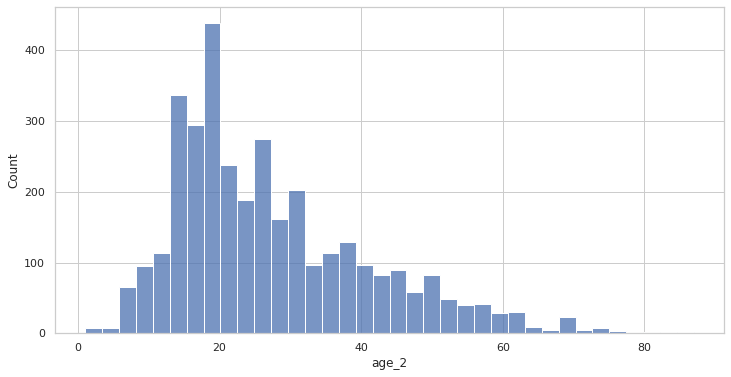

In [56]:
sns.histplot(x=tiburon_hipotesis[tiburon_hipotesis["age_2"] != "unknow"].age_2,);

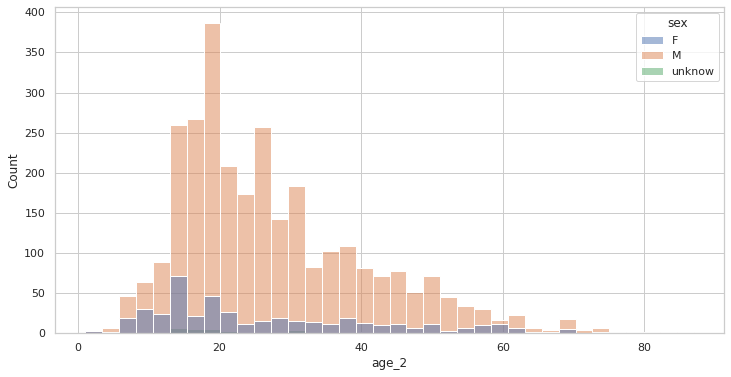

In [55]:
sns.histplot(x=tiburon_hipotesis[tiburon_hipotesis["age_2"] != "unknow"].age_2,hue=tiburon_hipotesis.sex);